# Анализ компьютерных игр

### Описание проекта
Интернет-магазин "Стримчик" продаёт по всему миру компьютерные игры. Нам доступны исторические данные(до 2016 г.) о продажах игр, оценки пользователей и экспертов, жанры и платформы.

### Цели проекта
Выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт в будущем и спланировать рекламные компании.

### План работы

1. Получение данных
2. Подготовка данных
3. Исследовательский анализ данных
3. Составление портрета пользователя каждого региона
5. Проверка гипотез
6. Общий вывод

### Описание данных

- `Name` - название игры
- `Platform` - платформа
- `Year_of_Release` - год выпуска
- `NA_sales` - продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` -  продажи в Европе (миллионы проданных копий)
- `JP_sales` -  продажи в Японии (миллионы проданных копий)
- `Other_sales` -  продажи в других странах (миллионы проданных копий)
- `Critic_Score` -  оценка критиков (максимум 100)
- `User_Score` -  оценка пользователей (максимум 10)
- `Rating` -  рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import spearmanr

sns.set_theme(style="whitegrid", palette="deep")

In [2]:
COLORS = {
    'head': '#266292',
    'platform': {
        'DS': '#B15928', 
        'PC': '#A6CEE3', 
        'PS': '#B2DF8A', 
        'GBA': '#33A02C',
        'PS2': '#FB9A99',
        'PSP': '#FF7F00',
        'X360': '#CAB2D6',
        'PS3': '#6A3D9A',
        'Wii': '#DEDE99',
        'PS4': '#FDBF6F',
        'XOne': '#F561DD',
        'PSV': '#A48CF4',
        'WiiU': '#A157DB',
        '3DS': '#A6D854' 
    },
    'genre': {
        "Action": '#B15928', 
        "Adventure": '#A6CEE3', 
        "Fighting": '#B2DF8A', 
        "Misc": '#33A02C',
        "Platform": '#FB9A99',
        "Puzzle": '#FF7F00',
        "Racing": '#CAB2D6',
        "Role-Playing": '#6A3D9A',
        "Shooter": '#DEDE99',
        "Simulation": '#FDBF6F',
        "Sports": '#F561DD',
        "Strategy": '#A48CF4',
    },
    'rating': {
        'M': '#B15928',
        'отсутствует': '#A6CEE3',
        'E': '#33A02C', 
        'T': '#FF7F00', 
        'E10+': '#6A3D9A'
    }
}

## Получение данных

Загрузим данные и посмотрим 5 первых и 5 последних строчек

In [4]:
data = pd.read_csv('data/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


У нас 16715 наблюдений и 11 переменных. Стоит привести названия переменных к змеиному стилю. Посмотрим общую информацию о датасете.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


У нас есть пропуски в следующих столбцах:
- `Name`
- `Year_of_Release`
- `Genre`
- `Critic_Score`
- `User_Score`
- `Rating`
стоит подробнее их изучить и принять решение, как с ними поступать.

Привести `Year_of_Release` к типу `int` у нас не получится, потому что там пропуски, а вот `User_Score` стоит привести к типу float.

## Подготовка данных

Приведем названия столбцов к нижнему регистру.

In [6]:
data.columns = map(
    str.lower, 
    data.columns
)

Удалим наблюдения с пропусками в столбцах `Name`, `Genre`. Таких наблюдений совсем немного и их удаление не повлияет на анализ.

In [7]:
# Сохраняем размер DataFrame до удаления пропусков
size_before = data.shape[0]

# Удалим строки с пропусками в колонках 'name' и 'genre'
data.dropna(
    subset=['name', 'genre', 'year_of_release'], 
    inplace=True
)

# Сохраняем размер DataFrame после удаления пропусков
size_after = data.shape[0]

# Вычисляем процент потерянных данных и выводим результат с двумя знаками после запятой
print(f'Мы потеряли {1 - size_after / size_before:.2%} данных.')

Мы потеряли 1.62% данных.


Мы потеряли совсем незначительное количество данных это никак не полияет на наши выводы.

Приведем год выпуска игр к целому числу.

In [8]:
data.year_of_release = data.year_of_release.astype('int')

Приведем `user_score` к типу float, но сначала заменим значения 'tbd'(подлежит уточнению) на NaN.

In [9]:
print('Количество значений "tbd" в столбце `user_score` - ', end=' ')
print(f'{data[data.user_score == "tbd"].shape[0]}')

Количество значений "tbd" в столбце `user_score` -  2376


In [10]:
data.user_score = data.user_score.map(
    lambda x: np.nan if x == 'tbd' else x
).astype('float')

Еще раз посмотрим количество пропусков в каждом столбце

In [11]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Посмотрим долю пропусков

In [12]:
data.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.514534
user_score         0.546157
rating             0.405984
dtype: float64

Заполним пропуски в столбце `rating` значением "отсутствует".

In [13]:
data.rating.fillna("отсутствует", inplace=True)

Остальные пропуски мы не станем заполнять, чтобы избежать искажения статистических показателей. Пропуски можно объяснить отсутствием данных в источнике или ошибки при сборе данных.

Создадим новую переменную `sales`, которая будет показывать суммарные продажи во всех регионах.

In [14]:
data['sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Проверим наши игры на дубликаты. Будем считать игры с одинаковым названием, платформой и годом дубликатами, посмотрим есть ли у нас такие.

In [15]:
data[data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


У нас одна игра встречается дважды, оставим первый вариант, так как во втором практически нет продаж.

In [16]:
data.drop_duplicates(
    subset=['name', 'platform', 'year_of_release'], 
    keep='first', 
    inplace=True
)

### Вывод по подготовке данных

Мы удалили пропуски в столбцах `name`, `year_of_release` и `genre`, таких наблюдений менее 2%, от общего числа наблюдений, поэтому это не повлияет на выводы. Привели `year_of_release` к типу `int`. Оценка критиков, оценка пользователей имеют большую долю пропусков(более 50%), удалить такие наблюдения нет возможности. Заполнять эти столбцы мы тоже не станем, чтобы не исказить анализ. Год выпуска имеет пропуски в 2% наблюдений, удалять такие наблюдения не станем, если будем анализировать игры в динамике или в разрезе года выпуска мы просто офильтруем их. Более 40% пропусков в столбце `rating`, мы заполнили такие строчки значением "отсутствует". Около 2500 наблюдений в столбце `user_score` имели значение 'tbd', что означает 'подлежит уточнению', мы заполнили такие значения строкой "отсутствует". Мы создали новую переменную `sales`, которая содержит суммарное количество продаж. 

## Исследовательский анализ данных

Посмотрим сколько игр выпускалось в разные годы

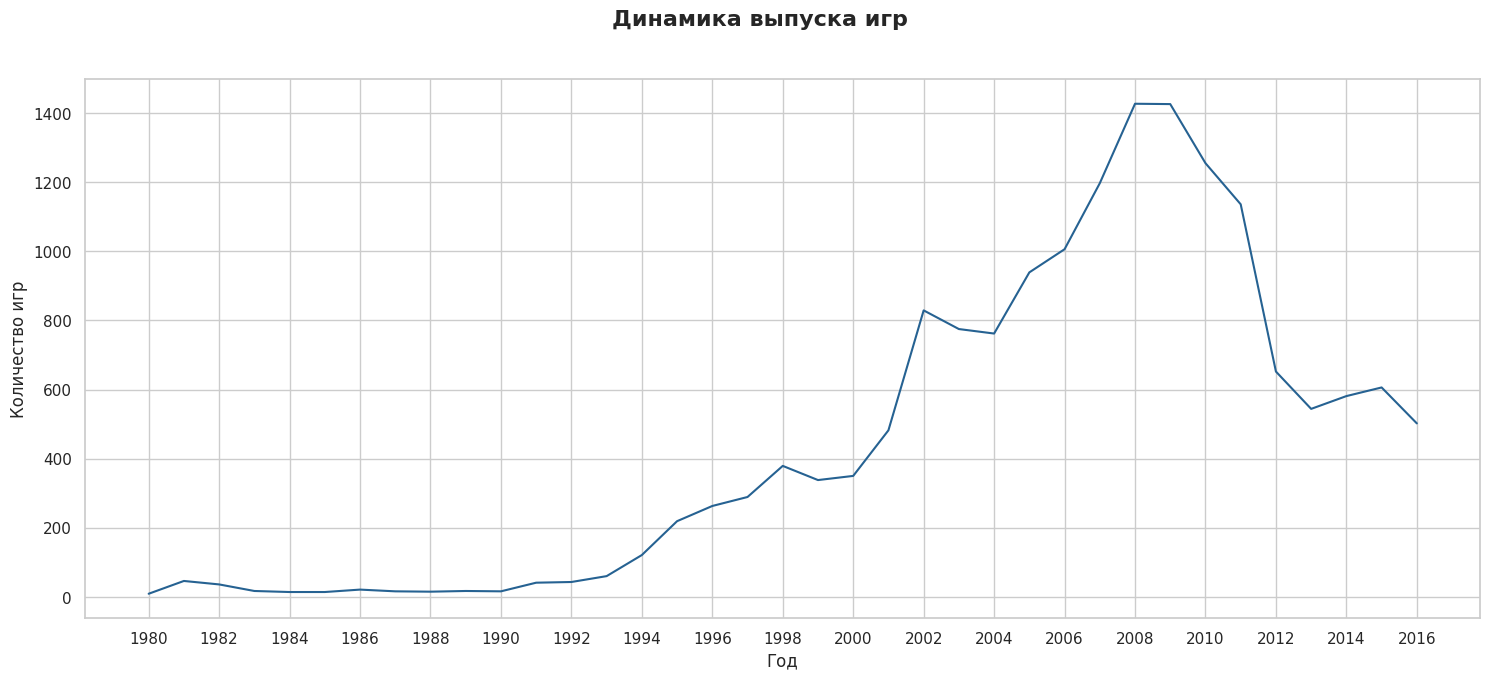

In [17]:
# Создаем фигуру и ось для графика
fig, ax = plt.subplots(figsize=(18, 7))

# Группируем данные по году выпуска и считаем количество уникальных названий
df = data.groupby('year_of_release')['name'].count()

# Создаем линейный график
sns.lineplot(
    x=df.index, 
    y=df, 
    ax=ax, 
    color=COLORS['head']
)

# Добавляем заголовок графика
plt.suptitle(
    'Динамика выпуска игр', 
    fontsize=16, 
    fontweight="bold"
)

# Добавляем подписи к осям
plt.xlabel('Год', fontsize=12)
plt.ylabel('Количество игр', fontsize=12)

# Устанавливаем количество меток на оси X
plt.locator_params(axis='x', nbins=20)

# Отображаем график
plt.show()

Мы видим, что у нас присутствуют наблюдения с 1980 года по 2016 год включительно. До 2000 года игры слабо напоминали современные игры, виной тому развитие производительности железа и игровой индутрии. Посмотрим как менялись продажи по платформам.

In [18]:
# Отбираем топ-10 платформ по продажам за все время
top = 10
top_platform = data.groupby(
    ['platform']
).sales.sum().sort_values(ascending=False)[:top]
top_platform

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
Name: sales, dtype: float64

In [19]:
# Группируем данные по платформам и году
df = data[
    data.platform.isin(top_platform.index)
].groupby(
    ['year_of_release', 'platform']
).sales.sum().to_frame().reset_index()

In [20]:
def plot_sales(data, years=20, ylim=None) -> None:
    """
    Отображает динамику продаж по платформам.

    Параметры:
    data (DataFrame): данные с колонками 'year_of_release', 'sales' и 'platform'
    years (int, опционально): количество меток на оси X
    ylim (tuple, опционально): диапазон значений для оси Y

    Возвращает:
    None
    """
    # Создаем фигуру и ось для графика
    fig, ax = plt.subplots(figsize=(18, 7))

    # Создаем линию на графике с выделением платформ разными цветами
    sns.lineplot(
        data=data, 
        x='year_of_release', 
        y='sales', 
        hue='platform', 
        palette=COLORS['platform']
    )

    # Добавляем заголовок графика
    plt.suptitle(
        'Динамика продаж по платформам', 
        fontsize=16, 
        fontweight="bold"
    )

    # Добавляем подписи к осям
    plt.xlabel('Год', fontsize=12)
    plt.ylabel('Продажи (млн. копий)', fontsize=12)

    # Устанавливаем количество меток на оси X
    plt.locator_params(axis='x', nbins=years)

    # Добавляем легенду с заголовком 'Платформа'
    plt.legend(title='Платформа')

    # Устанавливаем диапазон значений для оси Y
    if ylim:
        plt.ylim(0, ylim)

    # Отображаем график
    plt.show()

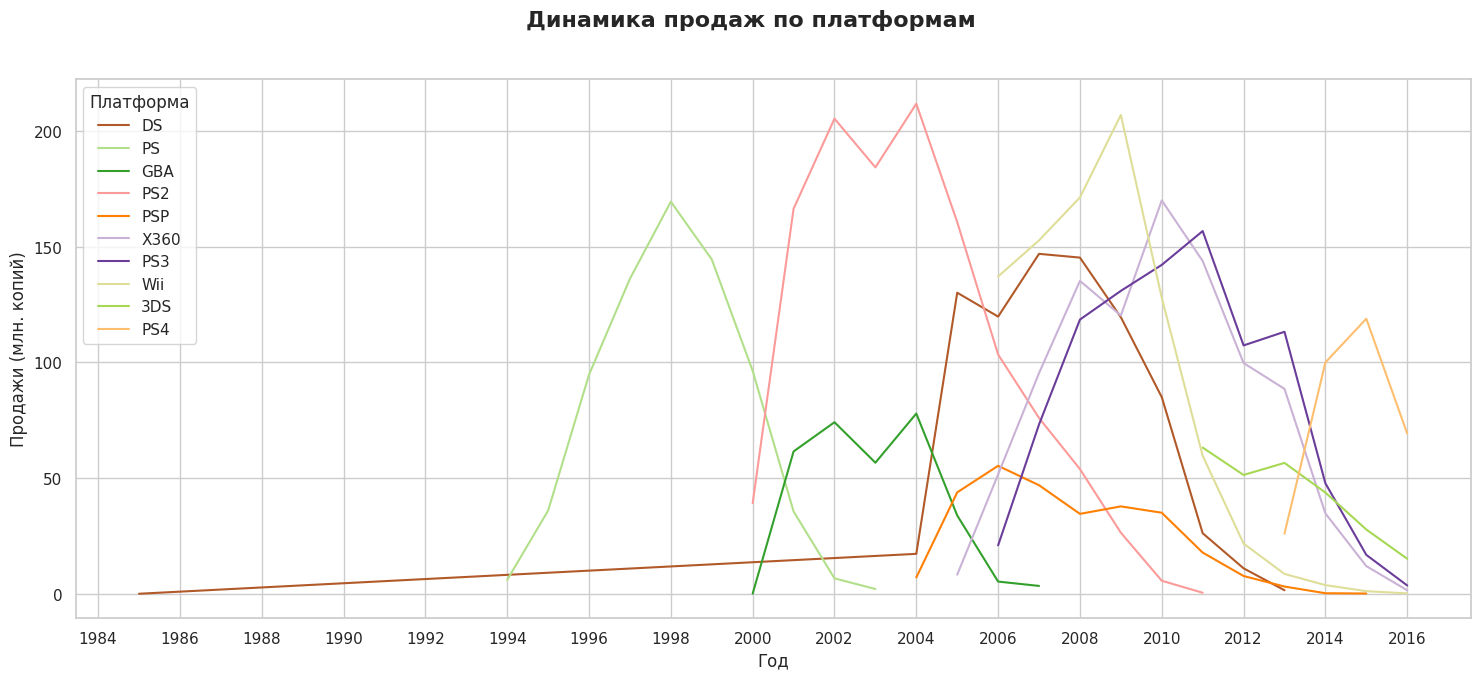

In [21]:
plot_sales(df)

Можем заметить, что игры для топовых платформ активно продаются 3-5 лет.  Игры для ПК продаются на протяжении всего наблюдаемого периода с пиком продаж в 2011 году, но особой популярностью они не пользуются, причиной тому бесплатные пиратские копии в интернете. Популярность жанров тоже меняются с годами, поэтому будем использовать последние 4 года для анализа. У нас есть игры приставки `DS` выпущенные в 1985 году посмотрим на них.

In [22]:
data[(data.year_of_release == 1985) & (data.platform == 'DS')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,NaN,NaN,отсутствует,0.02


Это ошибка в данных. Эта игра была выпущена в 2010, исправим ошибку.

In [23]:
data.loc[(data.year_of_release == 1985) & (data.platform == 'DS'), 'year_of_release'] = 2010

А теперь посмотрим какие платформы популярны за последние 4 года.

Определим жизненный цикл платформ.

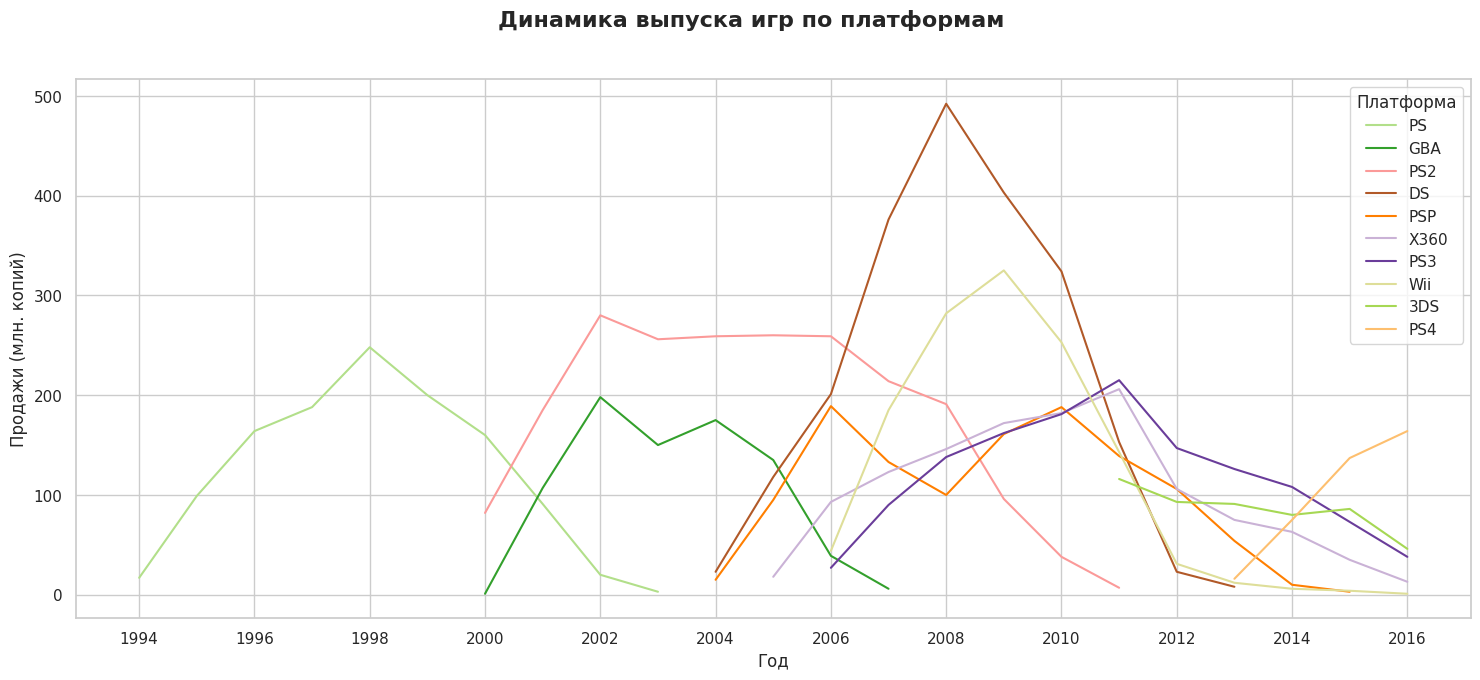

In [24]:
# Группируем данные по платформам и году
df = data[
    data.platform.isin(top_platform.index)
].groupby(
    ['year_of_release', 'platform']
).name.count().to_frame().reset_index()

# Создаем фигуру и ось для графика
fig, ax = plt.subplots(figsize=(18, 7))

# Создаем линию на графике с выделением платформ разными цветами
sns.lineplot(
    data=df, 
    x='year_of_release', 
    y='name', 
    hue='platform', 
    palette=COLORS['platform']
)

# Добавляем заголовок графика
plt.suptitle(
    'Динамика выпуска игр по платформам', 
    fontsize=16, 
    fontweight="bold"
)

# Добавляем подписи к осям
plt.xlabel('Год', fontsize=12)
plt.ylabel('Продажи (млн. копий)', fontsize=12)

# Устанавливаем количество меток на оси X
plt.locator_params(axis='x', nbins=20)

# Добавляем легенду с заголовком 'Платформа'
plt.legend(title='Платформа')

# Отображаем график
plt.show()

По графику видно, что игры выпускаются для платформы около 10 лет.

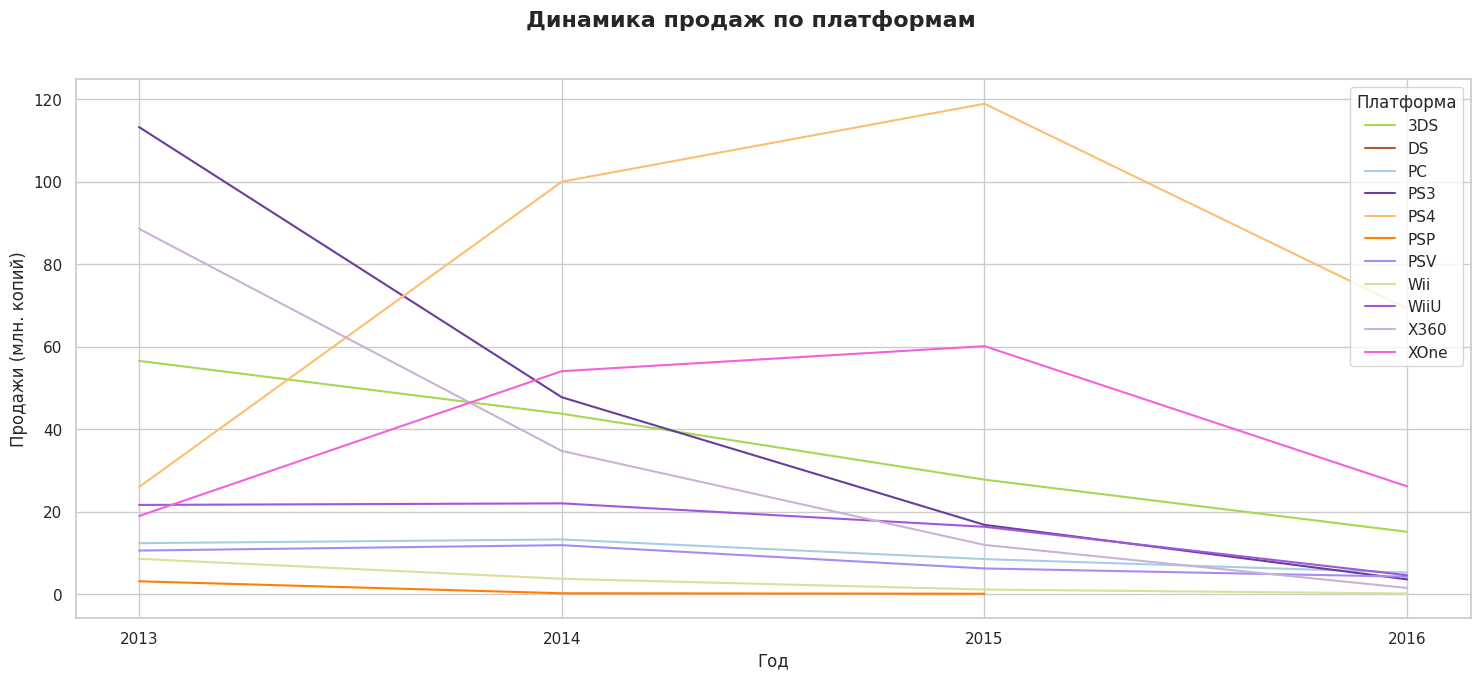

Топ платформы за 2015-2016 год


platform
PS4     188.15
XOne     86.29
3DS      42.92
Name: sales, dtype: float64

In [25]:
# Фильтруем и группируем по году и платформе
year = 2013
data_after_year = data[data.year_of_release >= year]
df = data_after_year.groupby(
    ['platform', 'year_of_release']
).sales.sum().to_frame().reset_index()

# Отрисовываем график
plot_sales(df, years=5)

# Выводим топ-3 платформы
print('Топ платформы за 2015-2016 год')
data[data.year_of_release > 2014].groupby(
    'platform'
).sales.sum().sort_values(ascending=False)[:3]

Игровая индустрия испытывает не лучшие времена. У нас три лидирующие платформы `PS4`, `XOne`, `3DS`, причем PS4 превышает ближайшего преследователя больше, чем в 2 раза. В 2015 году продажи росли на платформах `PS4` и `XOne`, так как за 2016 год у нас неполные данные, то вывод по динамике в 2016 году мы делать не можем. Продажи игр `3DS` снижаются с 2013 года. Получается мы имеем две потенциально прибыльные платформы `PS4` и `XOne`.

Построим ящик с усами по глобальным продажам игр в разбивке по платформам.

In [26]:
def box_plot_mean(data: pd.DataFrame, hue: str, *, suptitle: str, ylabel: str) -> None:
    # Сортируем платформы по медиане продаж
    sort_platforms = (
        data.groupby(hue)
       .sales.median()
       .sort_values(ascending=False)
       .index
    )

    # Создаем фигуру с двумя подграфиками
    fig, ax = plt.subplots(
        nrows=1, ncols=2, sharex=False, 
        gridspec_kw={"width_ratios": (.8,.2)},
        figsize=(18, 10)
    )

    # Рисуем ящик с усами для продаж по платформам
    sns.boxplot(
        data=data, 
        x='sales', 
        y=hue, 
        order=sort_platforms, 
        ax=ax[0], 
        palette=COLORS[hue]
    )

    # Рассчитываем средние продажи по платформам
    means = data.groupby(hue).sales.mean()

    # Рисуем столбчатую диаграмму для средних продаж по платформам
    sns.barplot(
        x=means, 
        y=means.index, 
        order=sort_platforms, 
        ax=ax[1], 
        palette=COLORS[hue]
    )

    # Устанавливаем границы оси X для первого графика
    ax[0].set_xlim(0, 4)

    # Добавляем главный заголовок
    plt.suptitle(
        suptitle, 
        fontsize=16, 
        fontweight="bold"
    )

    # Добавляем названия графиков
    ax[0].set_title('"Ящики с усами"', fontsize=14)
    ax[1].set_title('Распределение средних', fontsize=14)

    # Добавляем подписи к осям
    ax[0].set_xlabel('Продажи (млн. копий)', fontsize=12)
    ax[0].set_ylabel(ylabel, fontsize=12)
    ax[1].set_xlabel('Продажи (млн. копий)', fontsize=12)
    ax[1].set_ylabel('', fontsize=12)

    # Показываем график
    plt.show()

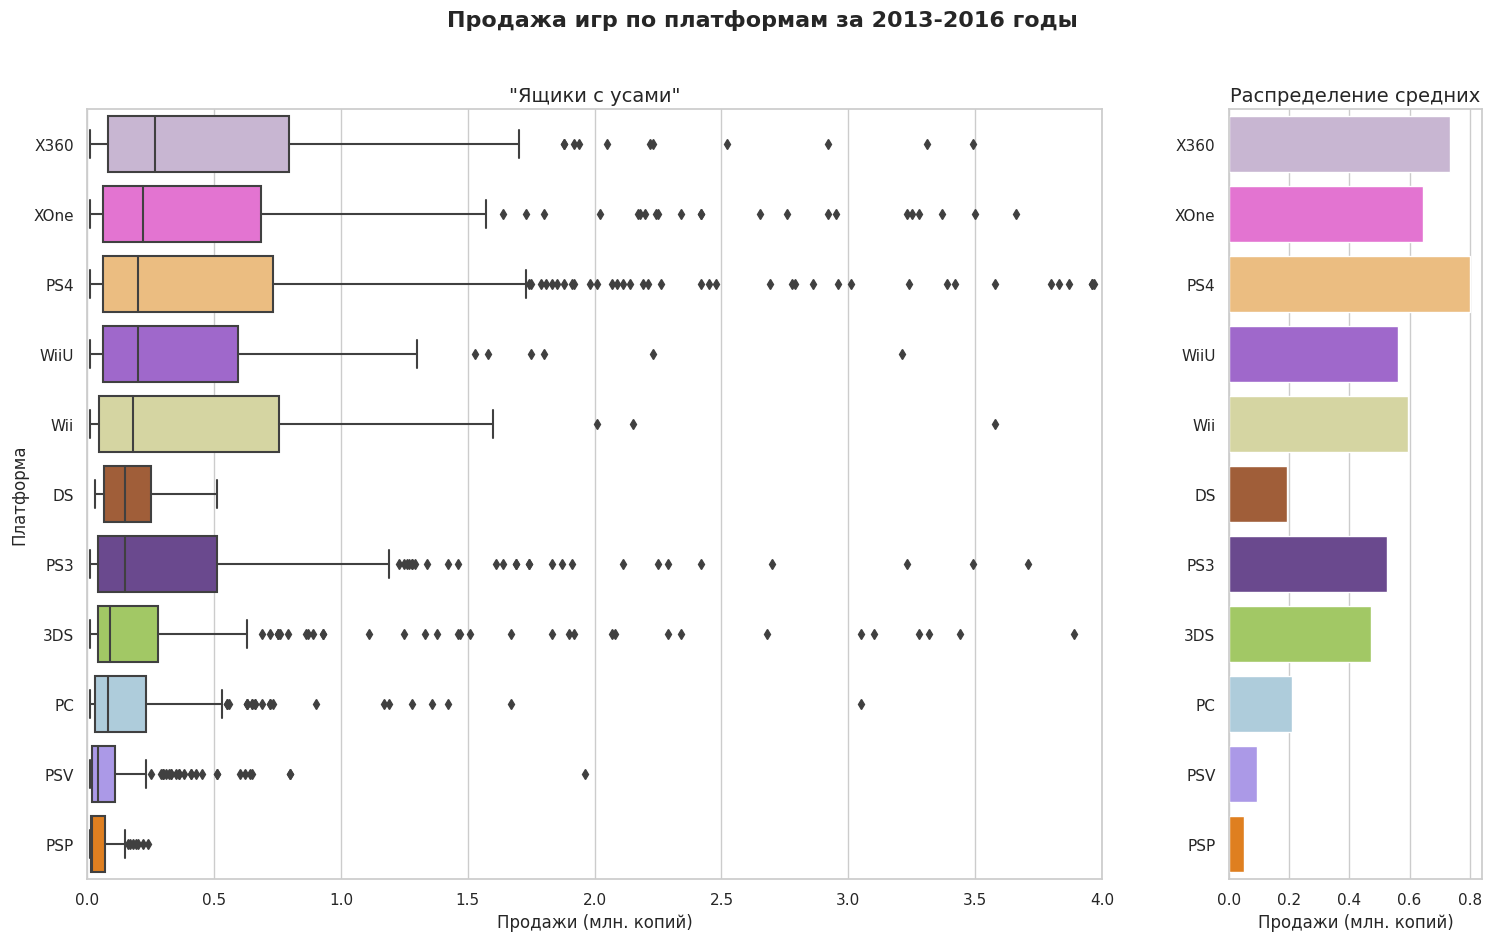

In [27]:
box_plot_mean(
    data_after_year, 
    hue='platform',
    suptitle='Продажа игр по платформам за 2013-2016 годы', 
    ylabel='Платформа'
)

"Ящики с усами" отсортированы по медиане продаж, на графике справа мы видим как распределены средние продажи по платформам. Игры на `XOne` имеют медиану продаж выше, чем игры на `PS4` это говорит нам о том, что как правило игры на приставке `XOne` продаются лучше игр `PS4`. Но нас не интересуют среднечки продаж, нас интересуют игры которые находятся в топе. Если мы посмотрим на распределение средних, то среднее количество продаж игр на `PS4` выше, чем на `XOne`, это нам говорит о том, что игры от sony имеют более длинный правый хвост распределения продаж. По "ящику с усами" мы также можем заметить, что игры от sony имеют намного больше выбросов, а соответственно хитов продаж среди игр на приставке от sony больше.

Посмотрим как продажи зависят от оценок критиков и пользователей. Возьмем топ-5 самых популярных платформ и построим диаграммы рассеивания.

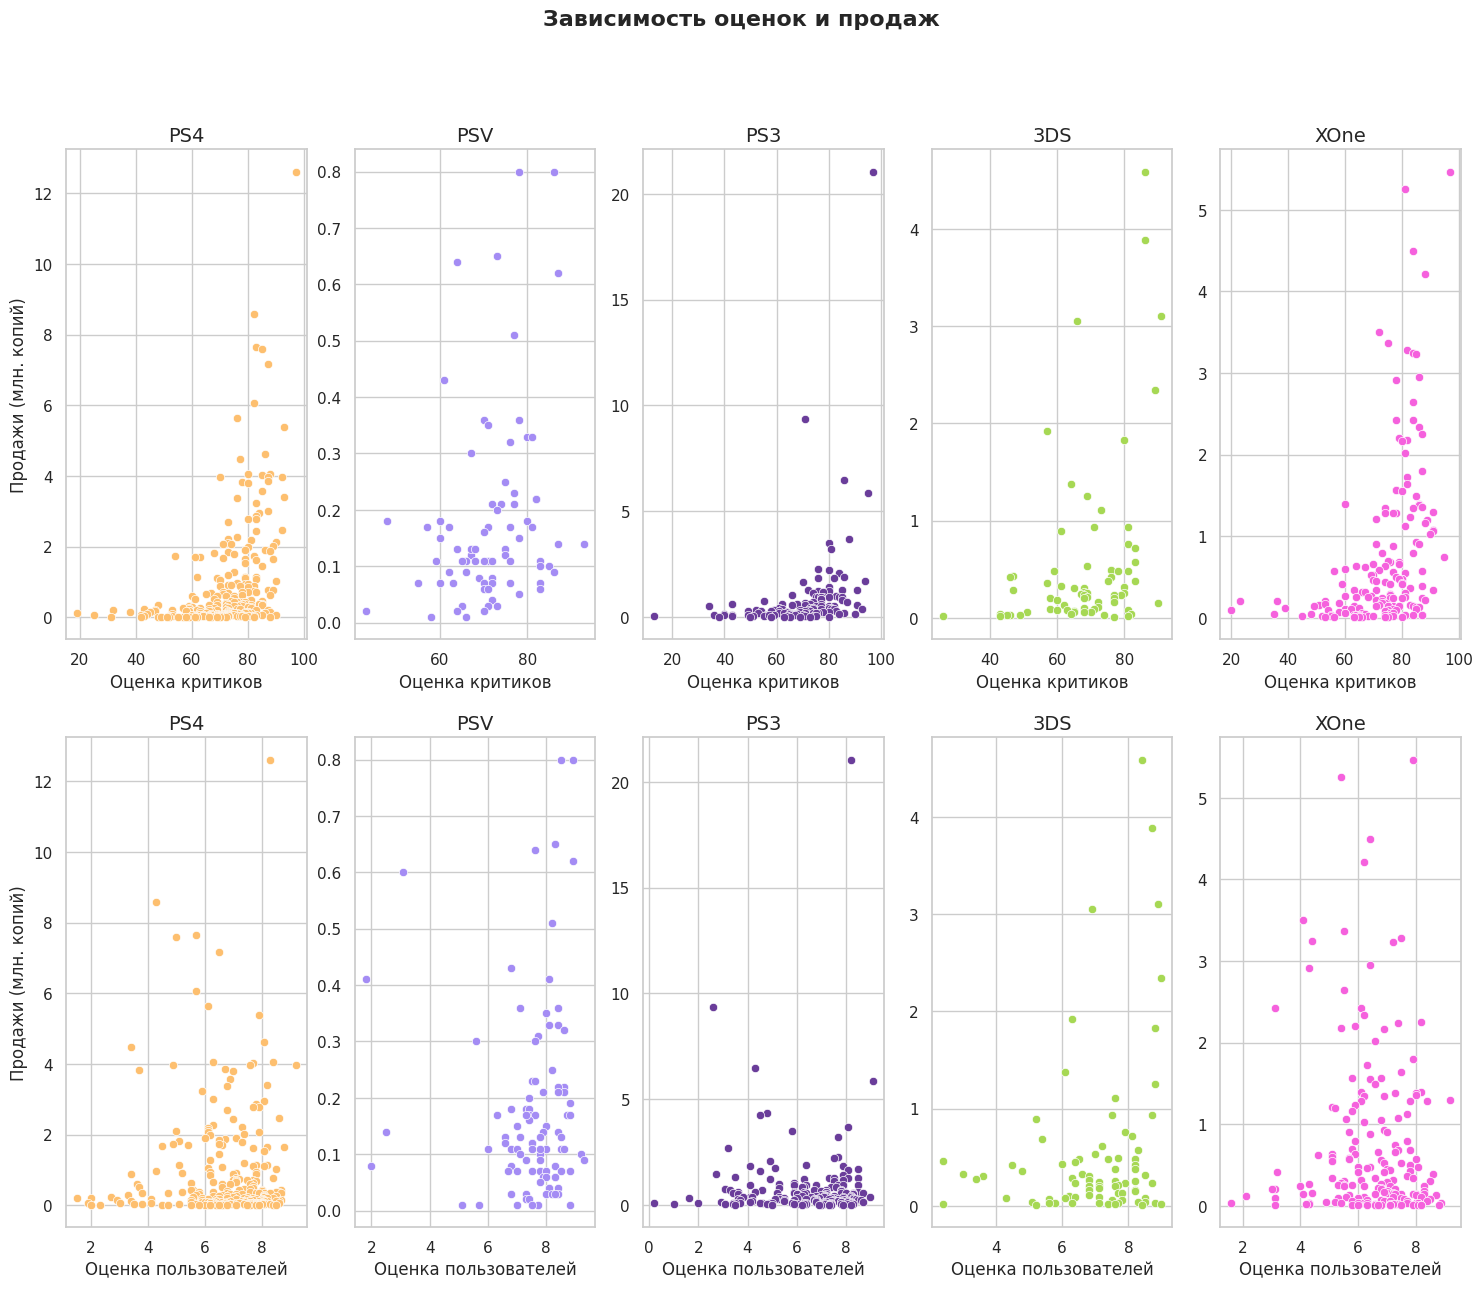

In [28]:
# Определяем топ-5 популярных платформ
top_platform = data_after_year.groupby(
    'platform'
).name.count().sort_values(ascending=False).index[:5]

# Создаем фигуру с 2x2 подграфиками
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(18, 14), sharex=False)

# Строим графики зависимости оценок и продаж
for i, platform in enumerate(top_platform):
    df = data_after_year[data_after_year.platform == platform]
    
    sns.scatterplot(
        data=df, 
        x='critic_score',
        y='sales', 
        ax=ax[0, i], 
        color=COLORS['platform'][platform]
    )
    
    sns.scatterplot(
        data=df, 
        x='user_score', 
        y='sales', 
        ax=ax[1, i], 
        color=COLORS['platform'][platform]
        
    )

# Устанавливаем подписи осей для всех графиков
for i, platform in enumerate(top_platform):
    ax[0, i].set_xlabel('Оценка критиков')
    ax[1, i].set_xlabel('Оценка пользователей')
    if i > 0:
        ax[1, i].set_ylabel('')
        ax[0, i].set_ylabel('')
    else:
        ax[1, 0].set_ylabel('Продажи (млн. копий)')
        ax[0, 0].set_ylabel('Продажи (млн. копий)')
    # Устанавливаем заголовки для каждого графика
    ax[0, i].set_title(platform, fontsize=14)
    ax[1, i].set_title(platform, fontsize=14)

# Устанавливаем заголовок для всей фигуры
plt.suptitle('Зависимость оценок и продаж', fontsize=16, fontweight="bold")

# Показываем график
plt.show()

Мы видим явную зависимость между продажами игр популярных платформ и оценкой критикой, а вот зависимости продаж от оценок пользователей мы не наблюдаем. Так как в наших наблюдениях присутствуют явные выбросы и зависимость не похожа на линейную рассчитаем корреляцию Спирмена и проведем статистический тест, является ли эта корреляция статистически значимой. Проведем двусторонний тест для каждой платформы с уровнем статистической значимости - 0.05.

In [29]:
def test_spearman(platform, score) -> None:
    """
    Тестирует корреляцию Спирмена между продажами и оценкой на определенной платформе.

    Args:
        platform (str): Название платформы.
        score (str): Название столбца с оценками.

    Returns:
        None
    """
    # Рассчитывает корреляцию Спирмена между продажами и оценками
    corr, pvalue = spearmanr(platform['sales'], platform[score])

    # Выводит значение корреляции Спирмена
    print(f'Корреляция Спирмена - {corr:.2f}')

    # Проверяет значимость корреляции
    if pvalue > 0.05:
        # Если корреляция не значима, выводит соответствующее сообщение
        print('Нет оснований утверждать, о зависимости переменных')
    else:
        # Если корреляция значима, выводит соответствующее сообщение
        print(f'Корреляция статистически значима')

In [30]:
# Пройдемся по популярным платформам
for platform in top_platform:
    
    df = data_after_year[data_after_year.platform == platform].dropna()
    print(f'Платформа - ~{platform}~')
    print('-'*40)
    print('Оценка критиков')
    print('-'*40)
    test_spearman(df, 'critic_score')
    print('-'*40)
    print('Оценка пользователей')
    print('-'*40)
    test_spearman(df, 'user_score')
    print('-'*40)
    print()

Платформа - ~PS4~
----------------------------------------
Оценка критиков
----------------------------------------
Корреляция Спирмена - 0.51
Корреляция статистически значима
----------------------------------------
Оценка пользователей
----------------------------------------
Корреляция Спирмена - -0.03
Нет оснований утверждать, о зависимости переменных
----------------------------------------

Платформа - ~PSV~
----------------------------------------
Оценка критиков
----------------------------------------
Корреляция Спирмена - 0.28
Корреляция статистически значима
----------------------------------------
Оценка пользователей
----------------------------------------
Корреляция Спирмена - 0.19
Нет оснований утверждать, о зависимости переменных
----------------------------------------

Платформа - ~PS3~
----------------------------------------
Оценка критиков
----------------------------------------
Корреляция Спирмена - 0.58
Корреляция статистически значима
-------------------------

Опираясь на результаты тестов мы можем с уверенностью утверждать, что есть корреляция между продажами и оценкой критиков. Можем сделать вывод, что чем выше оценка критиков тем выше вероятность что эта игра в топе продаж. А вот зависимость между оценкой пользователей и продажами мы не выявили.

Посмотрим общее распределение игр по жанрам

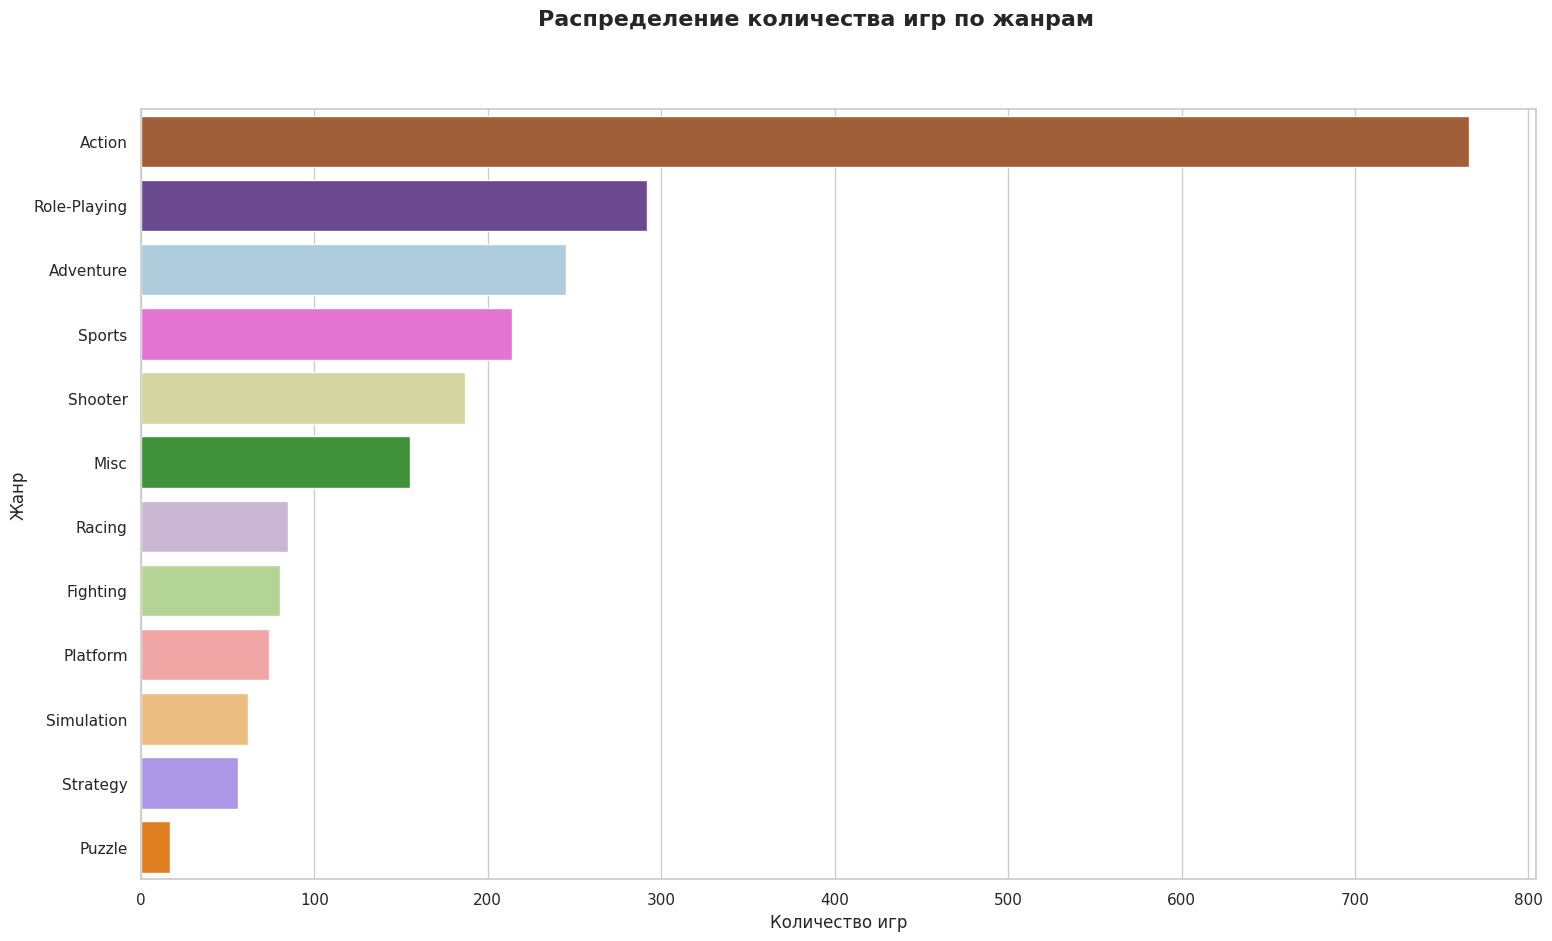

In [31]:
# Создаем фигуру для графика
fig, axs = plt.subplots(figsize=(18, 10))

# Получаем список жанров в порядке убывания количества игр
genres = data_after_year.groupby(
    'genre'
).name.count().sort_values(ascending=False).index

# Строим график количества игр по жанрам
sns.countplot(
    data=data_after_year, 
    y='genre', 
    palette=COLORS['genre'], 
    order=genres
)

# Устанавливаем заголовок графика
plt.suptitle(
    "Распределение количества игр по жанрам", 
    fontsize=16, 
    fontweight="bold"
)

# Устанавливаем подписи осей
plt.xlabel('Количество игр')
plt.ylabel('Жанр')

# Показываем график
plt.show()

Жанр `Action` лидирует с огромным отрывом. Давайте посмотрим как продажи распределены по жанрам.

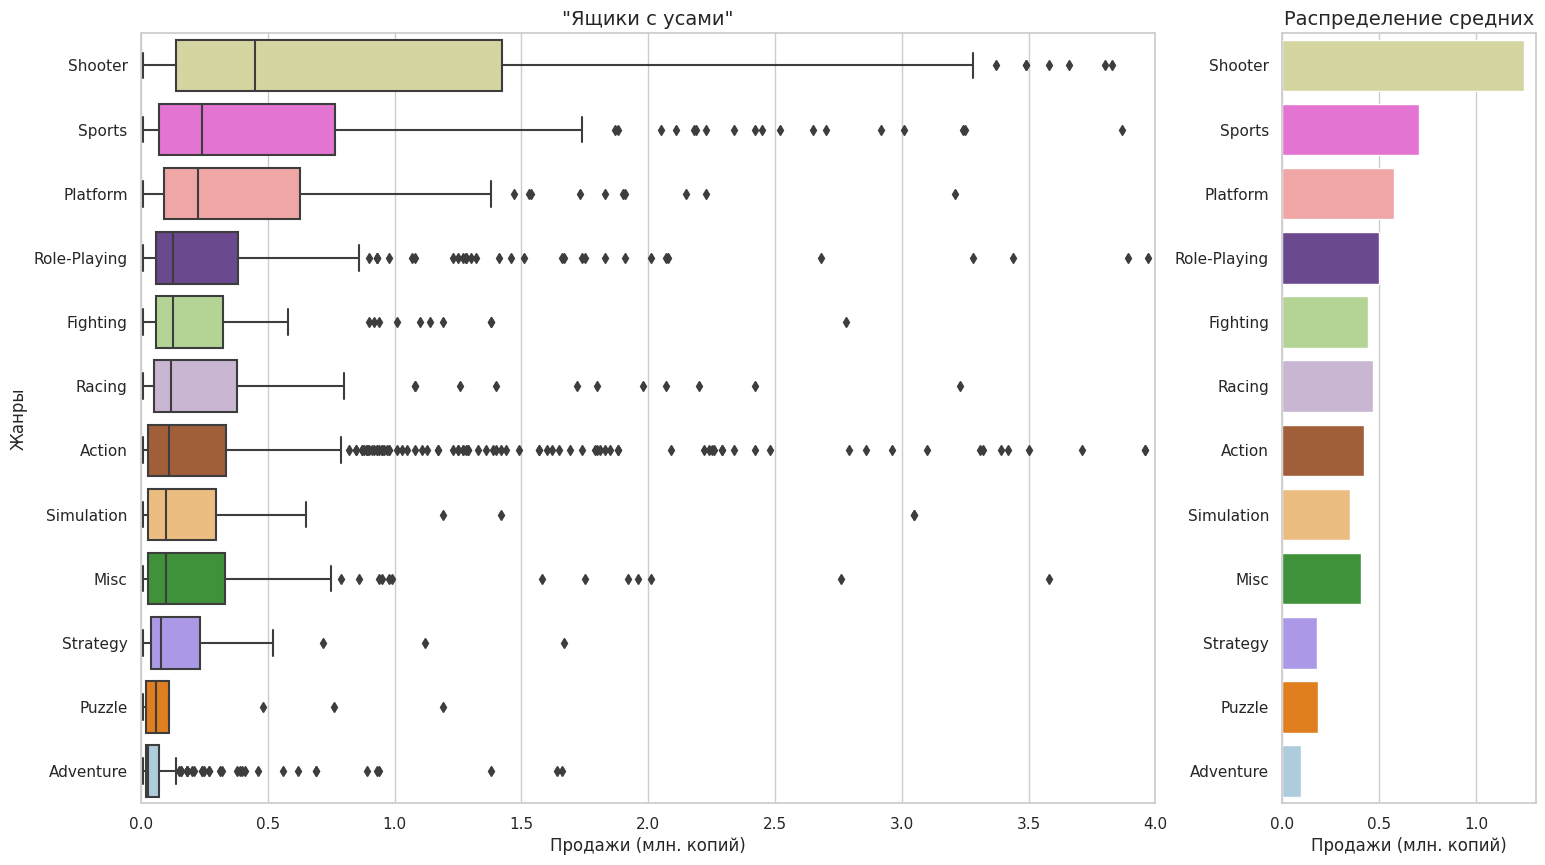

In [32]:
box_plot_mean(
    data_after_year,
    hue='genre',
    suptitle='',
    ylabel='Жанры'
)

Мы видим, что шутеры без сомнений продаются лучше всех. Также можем выделить жанры игр которые пользуются наибольшим спросом - Спортивные игры, платформеры. Тройка хуже всего продаваемых игр относятся к жанрам - приключения, головоломки и стратегии.

### Вывод по иссдедовательскому анализу

У нас в выборке присутствуют игры начиная c 1980 года выпуска до 2016 года. Как показал анализ игры популярных платформ активно выпускаются на протяжении 3-5 лет, потом появляется новое поколение приставок. Самые популярные платформы последних лет это `XOne` и `PS4`, так как они были выпущены в 2013 году, будем анализировать данные с 2013 года  по 2016 год. В 2014 и в 2015 годах на наших топ платформах, продажи росли. Наш график показывает небольшое снижение продаж в 2016 году, но виной этому может быть то, что у нас неполные данные за 2016 год. Анализ продаж показал, что хитов продаж больше среди игр на приставке от Sony. Мы выявили зависимость между оценкой критиков и продажей игр, чем выше оценка тем выше вероятность, что игра попадет в топ по продажам. Определены топ-3 жанра среди которых больше всего популярных игр это шутеры, спортивные игры и платформеры. Среди приключений, головоломок и стратегий меньше всего игр которые попадают в топ по продажам. 

## Портрет пользователя

In [33]:
def display_table(data: pd.DataFrame, *, hue: str, index_name: str) -> None:
    """
    Выводит сводную таблицу продаж по заданному признаку.

    Параметры:
    data (DataFrame): Данные для анализа.
    hue (str): Признак, по которому будет сформирована таблица.
    index_name (str): Название индекса таблицы.

    Возвращает:
    None
    """

    # Создаем сводную таблицу по платформам
    sales_platform = data_after_year.pivot_table(
        index=hue, # Строки
        values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales','sales'], # Столбцы
        aggfunc='sum'  # Функция агрегации - сумма
    )

    # Нормализуем значения таблицы по общей сумме продаж
    sales_platform = (
        sales_platform / sales_platform.sum()
    ).sort_values(by='sales', ascending=False)

    # Переименовываем индекс и столбцы таблицы
    sales_platform.index.name = index_name
    sales_platform.columns = [
        'Европа', 
        'Япония', 
        'Северная америка', 
        'Другие регионы', 
        'Все регионы'
    ]

    # Выводим таблицу с форматированием
    display(
        sales_platform.style.format("{:.2%}")
       .background_gradient(cmap='Reds')
    )

Посмотрим как продажи по платформам распределены в различных регионах.

In [34]:
display_table(
    data_after_year, 
    hue='platform', 
    index_name='Платформа'
)

,Европа,Япония,Северная америка,Другие регионы,Все регионы
Платформа,,,,,
PS4,35.97%,11.34%,24.84%,40.30%,28.80%
PS3,17.29%,16.59%,14.51%,22.31%,16.63%
XOne,13.15%,0.24%,21.27%,11.89%,14.61%
3DS,7.89%,48.17%,8.73%,5.23%,13.13%
X360,10.84%,0.36%,18.66%,10.09%,12.54%
WiiU,5.06%,7.73%,6.67%,3.91%,5.93%
PC,6.47%,0.00%,2.54%,2.47%,3.62%
PSV,1.56%,13.21%,1.15%,2.72%,3.02%
Wii,1.51%,0.04%,1.50%,0.93%,1.25%


Можем сражу заметить, что пользователи в Японии очень сильно отличаются от всех остальных. Если смотреть на доли продаж у японцев почти половина продаж приходится на портативную приставку  `3DS` и больше 13% на портативную приставку `PSV`. Почти 8% продаж в японии приходится `WiiU`, а ее тоже можно использовать как портативную консоль. Можно сделать вывод, что японцы любят играть на портативных приставках и среди них особым спросом пользуется приставка `3DS`. Японцы практически не покупают игры для `PC`. В Европе также как и в других регионах самой популярной приставкой является `PS4`. Нужно отметить, что в Европе 6.5% продаж приходится на `PC`, а в других регионах на эту платформу приходится около 2.5%. В Северной Америке `XOne` имеет практически такую же долю продаж как `PS4`. 

А теперь взглянем на популярность жанров в различных регионах.

In [35]:
display_table(
    data_after_year, 
    hue='genre', 
    index_name='Жанр'
)

,Европа,Япония,Северная америка,Другие регионы,Все регионы
Жанр,,,,,
Action,30.12%,28.76%,28.80%,31.01%,29.51%
Shooter,22.40%,4.70%,25.07%,23.98%,21.36%
Sports,15.43%,3.84%,14.91%,16.21%,13.81%
Role-Playing,9.43%,36.26%,10.60%,9.57%,13.38%
Misc,5.11%,6.54%,6.28%,5.08%,5.76%
Platform,3.97%,3.40%,4.14%,3.43%,3.91%
Racing,5.15%,1.63%,2.96%,3.70%,3.66%
Fighting,2.18%,5.43%,3.55%,2.97%,3.24%
Adventure,2.10%,4.13%,1.63%,2.03%,2.17%


И опять японский игрок заметно отличается от всех остальных. Самый любимый жанр у японцев это `Role-Playing`, продажи в этом жанре составляют более трети всех продаж в Японии. Японцы не очень любят шутеры, а файтинги продаются немногим лучше, чем в других регионах. Во всех других регионах самыми популярными жанрами являются - `Action`, `Shooter` и `Sports`. Можно отметить, что гонки в европе немного популярнее, чем в других регионах.

In [36]:
display_table(
    data_after_year, 
    hue='rating', 
    index_name='рэйтинг ESRB'
)

,Европа,Япония,Северная америка,Другие регионы,Все регионы
рэйтинг ESRB,,,,,
M,37.05%,10.02%,37.74%,39.21%,34.08%
отсутствует,20.12%,60.41%,20.43%,19.55%,25.38%
E,21.25%,10.75%,18.06%,18.85%,18.35%
T,10.70%,14.63%,11.38%,11.91%,11.61%
E10+,10.88%,4.18%,12.39%,10.48%,10.58%


- «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults")
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.
- «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.
- «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.

И опять японский пользователь отличается от всех остальных. В Японии более 60% игр продается без рэйтинга ESRB, самым популярным рейтингом является - "T"(около 15%). В остальных регионах самые популярные игры в категории для взрослых, а на втором и третьем месте игры без категории и те которые находятся в категории для всех.

### Японский геймер
Японские геймеры любят играть на портативных приставках, самая популярная из которых является `3DS`. Японцы практически не играют на `XOne`, из домашних консолей выбирают `PS4`. Самый популярный жанр в Японии это `Role-Playing`, также в Японии файтинги популярнее, чем в других регионах. В Японии более 60% игр продается без рэйтинга ESRB, самым популярным рейтингом является - «T»(около 15%).

### Европейский геймер
Самая популярная приставка в Европе это `PS4`, продажи игр на `XOne` в два раза ниже. Портативные приставки в Европе особой популярностью не пользуются. Можно отметить, что продажи игр на `PC` выше чем в других регионах. Самые популярные жанры в Европе это `Action`, `Shooter` и `Sports`. А жанры игр которые продаются хуже всех это `Puzzle`, `Strategy` и `Adventure`. Самым популярным рейтингом ESRB, является «M». Без рейтинга в Европе продается более 20% игр.

### Северо-Американский геймер
В Северной Америке как и в Европе самой популярной приставкой является `PS4`,  но от нее совсем не на много отстает `XOne`. Топ-3 жанра в Северной Америке не отличаются от Европейских - Action, Shooter и Sports. Самый популярный рейтинг ESRB, это «M» - для взрослых. 

### Геймер из других регионов
В остальных регионах еще большую долю рынка берет на себя `PS4`, `XOne` отстает от приставки от sony более, чем в 3 раза. Топ-3 жанра в остальных регионах не отличается от Европы и Северной Америки - `Action`, `Shooter` и `Sports`. Самый популярный рейтинг ESRB, это «M» - для взрослых. Около четверти всех продаж игр без рейтинга ESRB, а почти пятая часть «E» («Everyone») — «Для всех».

## Проверка гипотез

В проверке гипотез будем использовать `bootstrap`, этот тест не требует никаких параметрических предположений. Мы предполагаем, что наша выборка это эмпирическая функция распределения, конечно наша выборка должна быть репрезентативна. В проверках наших гипотез будем использовать уровень статистической значимости - $\alpha$ = 0.05.

### Гипотеза о том, что средние пользовательские оценки игр `Xbox One` и `PC` не различаются.

Визуализируем распределения пользовательских оценок наших платформ.

In [37]:
def plot_distribution(
    data: pd.DataFrame, 
    *, 
    hue: str, 
    subsample: list[str, str], 
    legend_title: str) -> None:
    """
    Построить гистограмму распределения пользовательских оценок для двух платформ.

    Параметры:
    data (pd.DataFrame): Датасет с данными о пользовательских оценках.
    hue (str): Имя столбца, по которому будет проводиться группировка (например, 'platform').
    subsample (list[str, str]): Список из двух названий платформ, для которых будет построена гистограмма.
    legend_title (str): Заголовок легенды.

    Возвращает:
    None
    """

    # Создать фигуру и ось для графика
    fig, axs = plt.subplots(figsize=(18, 10))

    # Отфильтровать данные по заданным платформам
    df = data[
        (data[hue] == subsample[0]) | 
        (data[hue] == subsample[1])]

    # Построить гистограмму распределения пользовательских оценок
    sns.histplot(
        data=df, 
        x='user_score', 
        hue=hue, 
        palette=COLORS[hue]
    )

    # Добавить заголовок графика
    plt.suptitle(
        'Распределение пользовательских оценок',  
        fontsize=16, 
        fontweight="bold"
    )

    # Добавить подписи к осям
    plt.xlabel('Оценка пользователя')
    plt.ylabel('Частота')

    # Создать патчи для легенды
    pc_patch = mpatches.Patch(
        color=COLORS[hue][subsample[0]], 
        label=subsample[0]
    )
    xone_patch = mpatches.Patch(
        color=COLORS[hue][subsample[1]], 
        label=subsample[1]
    )

    # Добавить легенду
    plt.legend(title=legend_title, handles=[pc_patch, xone_patch])

    # Показать график
    plt.show()

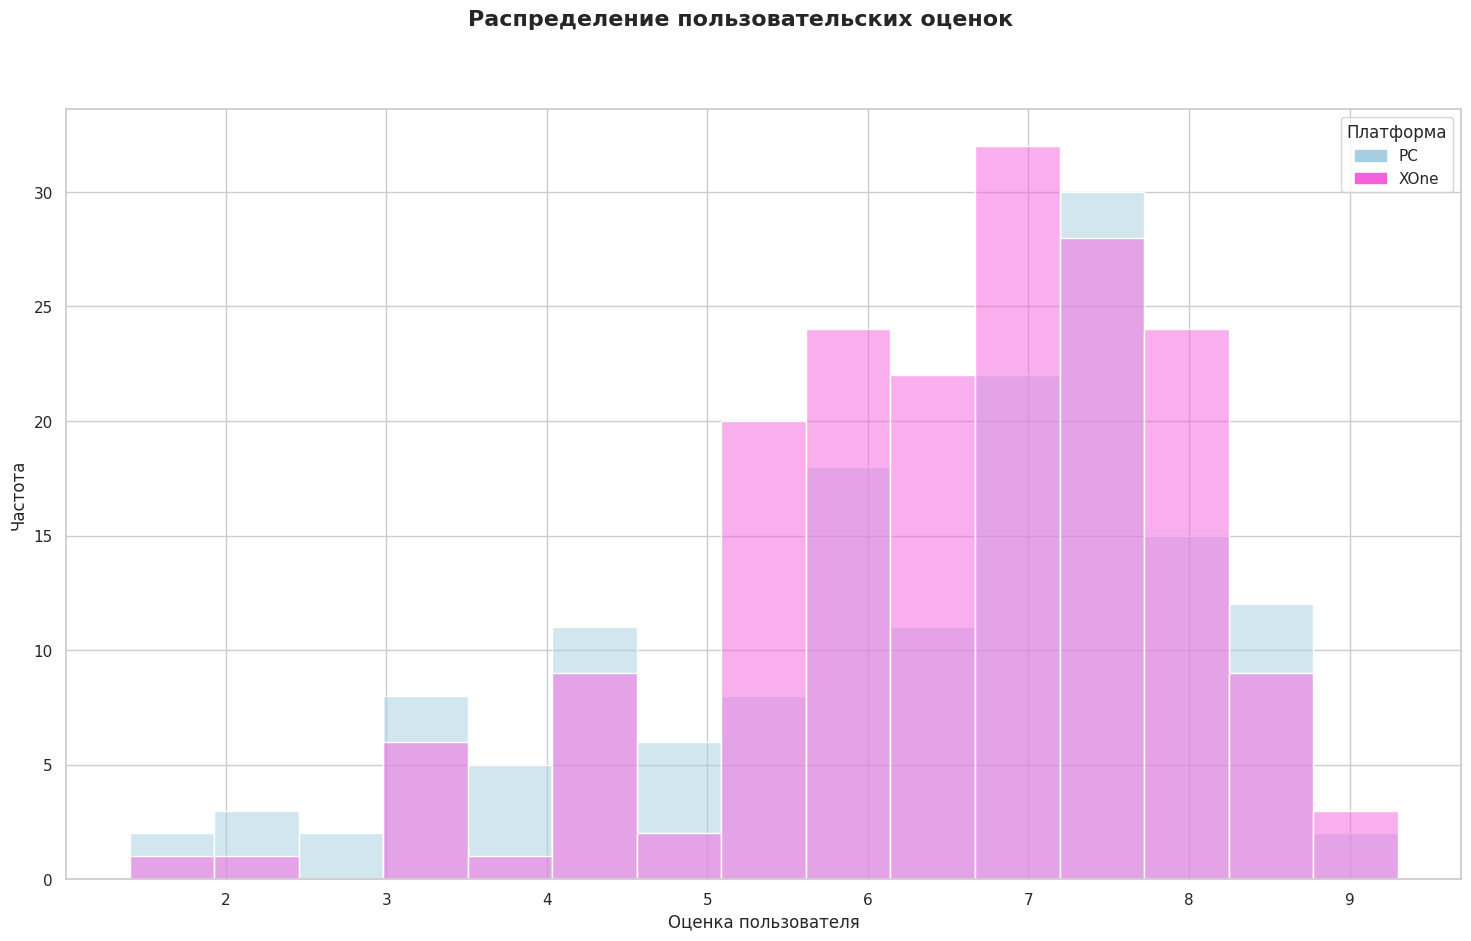

In [38]:
plot_distribution(
    data_after_year,
    hue='platform',
    subsample=['PC', 'XOne'],
    legend_title='Платформа'
)

Можно увидеть, что наши распределения немного отличаются. Геймеры на `PC` ставят чаще оценки ниже 5, и реже оценки 5-7, чем геймеры `XOne`.

Сформулируем нашу гипотезу на языке математике:

$ \mathsf{H}_0: \mu_1 = \mu_2 $<br>
$ \mathsf{H}_1: \mu_1 \neq \mu_2 $, где

$ \mu_1 $ - математическое ожидание пользовательской оценки игр на платформе `PC` <br>
$ \mu_2 $ - математическое ожидание пользовательской оценки игр на платформе `XOne`

$\alpha$ = 0.05

In [39]:
#  Определяем доверительный интервал(1 - alpha)
CONF_LVL = 0.95

def bootstrap_ci(sample1, sample2, *, n_trials=10_000, statistic=np.mean):
    """
    Вычислить доверительный интервал для разницы между двумя выборками с помощью метода bootstrap.

    Параметры:
    sample1 (pd.Series): Первая выборка.
    sample2 (pd.Series): Вторая выборка.
    n_trials (int): Количество повторений bootstrap (по умолчанию 10 000).
    statistic (callable): Статистика, для которой вычисляется доверительный интервал (по умолчанию np.mean).

    Возвращает:
    tuple: Доверительный интервал в виде tuple из двух значений.
    """
    # Создать генератор случайных чисел
    rng = np.random.default_rng()
    
    # Создать список для хранения значений статистики
    stat_distrib = []
    
    # Повторить bootstrap n_trials раз
    for _ in range(n_trials):
        # Выбрать случайные подвыборки из исходных выборок
        boot_sample1 = rng.choice(sample1, len(sample1), replace=True)
        boot_sample2 = rng.choice(sample2, len(sample2), replace=True)
        
        # Вычислить значение статистики для подвыборок и добавить в список
        stat_distrib.append(statistic(boot_sample1) - statistic(boot_sample2))
    
    # Вычислить доверительный интервал
    result = do_some_math(stat_distrib)
    
    # Визуализировать результаты
    do_some_viz(result, stat_distrib)
    
    return result


def do_some_math(data):
    """
    Вычислить доверительный интервал из распределения статистики.

    Параметры:
    data (list): Список значений статистики.

    Возвращает:
    tuple: Доверительный интервал в виде tuple из двух значений.
    """
    # Вычислить квантили распределения
    left_q = (1 - CONF_LVL) / 2
    right_q = 1 - left_q
    
    # Вычислить доверительный интервал
    ci = np.quantile(data, [left_q, right_q])
    
    return ci


def do_some_viz(res, data):
    """
    Визуализировать результаты bootstrap.

    Параметры:
    res (tuple): Доверительный интервал.
    data (list): Список значений статистики.

    Возвращает:
    None
    """
    # Создать график
    fig, axs = plt.subplots(figsize=(18, 10))
    
    # Построить гистограмму распределения статистики
    hist = plt.hist(data, bins=62, color=COLORS['head'])
    
    # Вычислить максимальное значение гистограммы
    ymax = hist[0][np.argmax(hist[0])]
    
    # Добавить вертикальные линии для среднего значения и доверительного интервала
    plt.vlines(np.mean(data), ymin=0, ymax=ymax+50, colors='black', 
                label=f'Среднее значение статистики: {np.mean(data).round(3)}')
    plt.vlines(res, ymin=0, ymax=ymax//2.5, linestyle='--', colors='black', 
                label=f'95% доверительный интервал: {res[0].round(3)} and {res[1].round(3)}')
    
    # Добавить подписи к осям
    plt.xlabel('Значение статистики')
    plt.ylabel('Частота')
    
    # Добавить заголовок графика
    plt.suptitle(
        'Распределение статистики',  
        fontsize=16, 
        fontweight="bold"
    )
    
    # Добавить легенду
    plt.legend(loc=0)
    
    return None

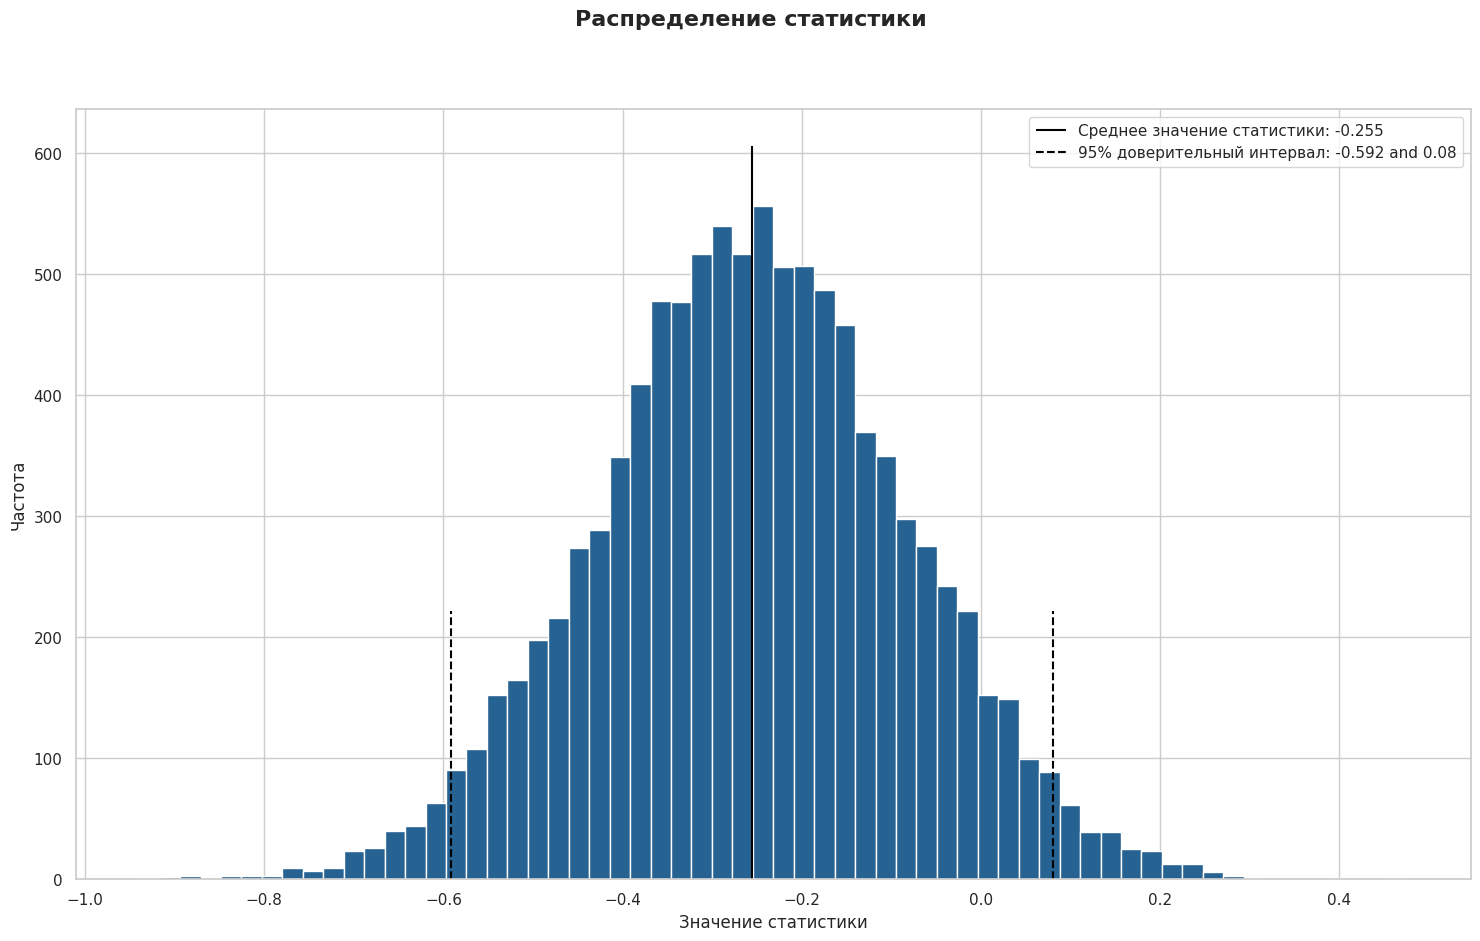

In [40]:
sample1 = data_after_year.loc[data_after_year.platform == 'PC', 'user_score'].dropna()
sample2 = data_after_year.loc[data_after_year.platform == 'XOne', 'user_score'].dropna()

ci = bootstrap_ci(sample1, sample2)

Мы 10000 раз формировали выборки с возвращением, размером с первоначальную выборку, вычисляли среднее в каждой выборке, и вычисляли разницу между средними. Значение статистики мы добавляли в список. У нас получилось такое распределение разницы средних, где 0 попадает в 95% доверительный интервал. Так как 0 попал в 95% доверительный интервал, мы не можем отвергнуть нулевую гипотезу о том, что математическое ожидание пользовательских оценок игр на `PC` не отличается от математического ожидания пользовательских оценок игр на `XOne`.

### Гипотеза о том, что средние пользовательские рейтинги жанров `Action` и `Sports` разные.

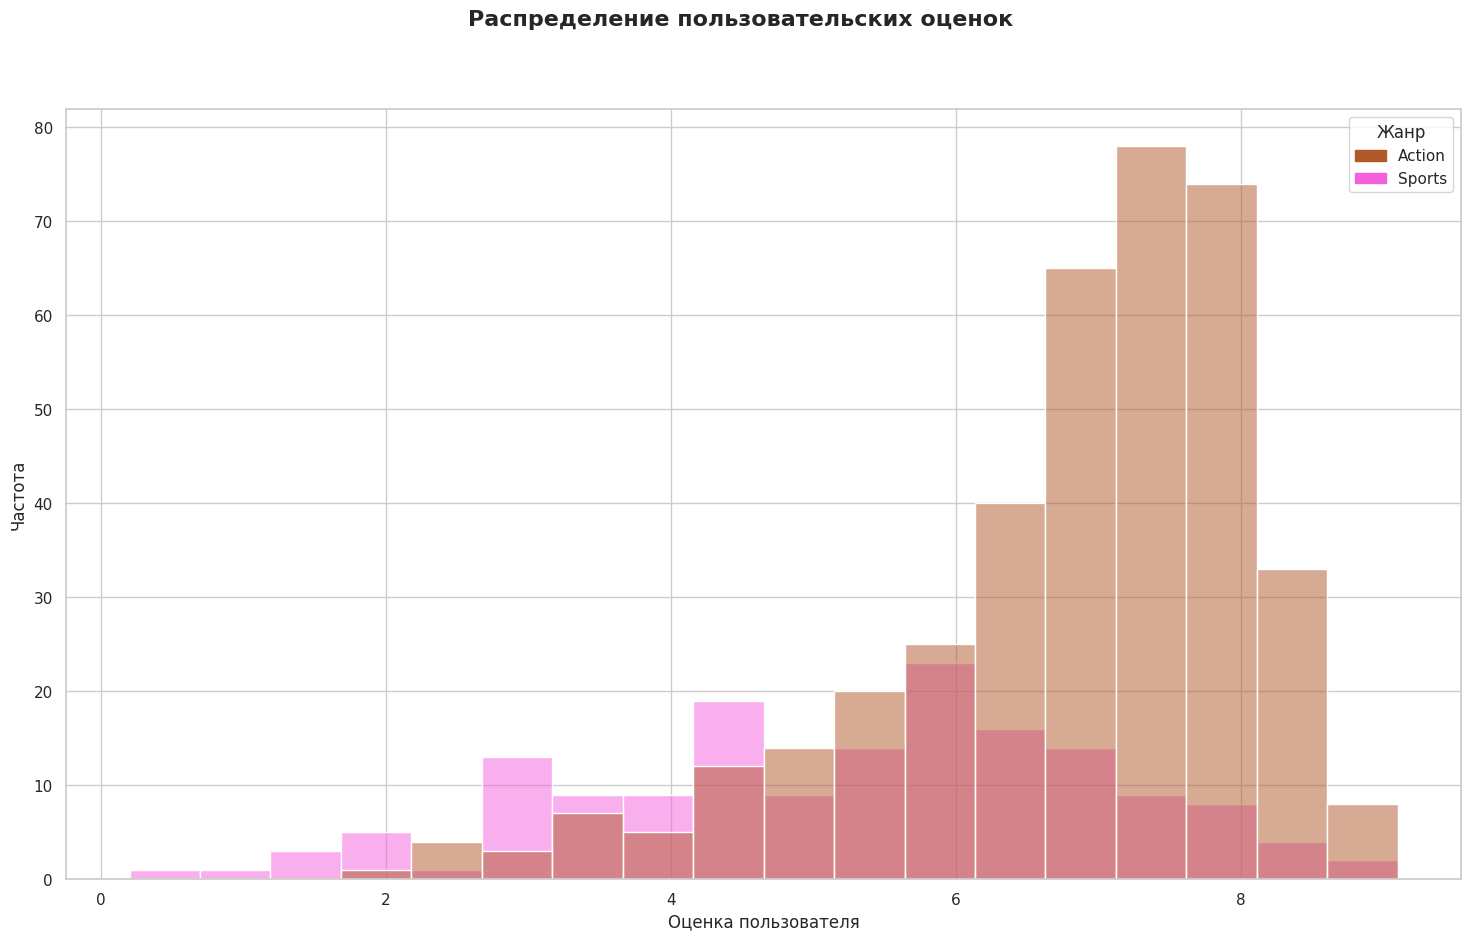

In [41]:
plot_distribution(
    data_after_year,
    hue='genre',
    subsample=['Action', 'Sports'],
    legend_title='Жанр'
)

Видим, что наши распределения сильно отличаются, видно что в жанре `Action` пользователи ставят более высокие оценки. Проведем тест и выясним является ли это различие статистически значимое.

Сформулируем нашу гипотезу на языке математике:

$ \mathsf{H}_0: \mu_1 = \mu_2 $<br>
$ \mathsf{H}_1: \mu_1 \neq \mu_2 $, где

$ \mu_1 $ - математическое ожидание пользовательской оценки игр жанра `Action` <br>
$ \mu_2 $ - математическое ожидание пользовательской оценки игр жанра `Sports`

$\alpha$ = 0.05

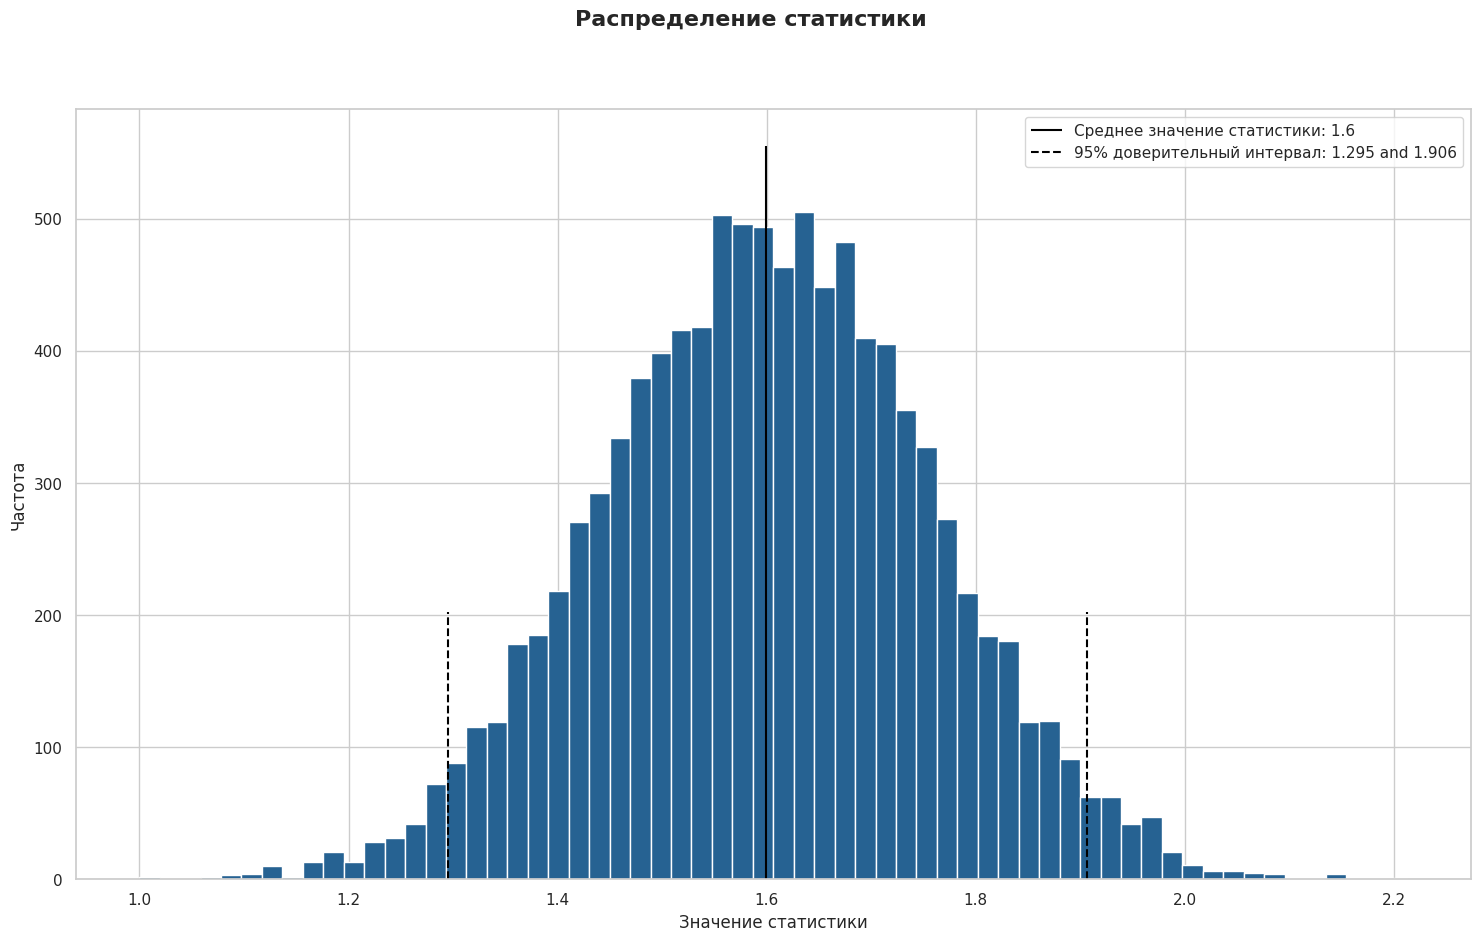

In [42]:
sample1 = data_after_year.loc[data_after_year.genre == 'Action', 'user_score'].dropna()
sample2 = data_after_year.loc[data_after_year.genre == 'Sports', 'user_score'].dropna()

ci = bootstrap_ci(sample1, sample2)

Мы видим, что ноль не попадает в доверительный интервал. 95% доверительный интервал разницы наших средних - [1.295, 1.905]. Значит мы можем сделать вывод, что пользовательские оценки игр bp жанра `Асtion` как правило больше, пользовательских оценок игр из жанра `Sports`.

### Вывод по проверки гипотез
Мы не нашли статистически значимого различия между средним пользовательских оценок игр на платформе `PC` и средним пользовательских оценок игр на платформе `XOne`. Среднее пользовательских оценок игр жанра `Action` больше среднего пользовательских оwенок жанра `Sports`. 95% доверительный итервал разницы этих средних - [1.295, 1.905].

## Общий вывод

В нашей выборке присутствовали игры 1980-2016 годов выпуска. Анализ показал, что игры для платформы активно выпускаются в течении 3-5 лет. Самые популярные платформы последних лет это `PS4` и `XOne`. Эти приставки были выпущены в 2013 году, поэтому было принято решение анализировать период с 2013 года по 2016 год включительно. В 2014 и 2015 годах продажи на наших топовых платформах росли. В 2016 году наблюдается небольшое снижение выпуска игр на `PS4` и `XOne`, но причиной этому могут быть неполные данные за 2016 год. Анализ продаж показал, что хитов среди игр `PS4` больше, чем среди `XOne`. Мы выявили положительную корреляцию между оценкой критиков и продажами игр. Среди популярных по продажам игр больше всего шутеров, спортивных игр и платформеров. Как правило хуже других продаются приключения, головоломки и стратегии.

Японские геймеры сильнее всего отличаются от других. В японии самой популярной является портативная приставка `3DS`, и вообще в японии портативные приставки популярнее, чем в других регионах. Японцы практически не играют в `XOne`, из домашних консолей самой популярной является `PS4`. Японские геймеры лучше всего приобретают `Role-Playing` игры, также в японии файтинги популярнее, чем в других регионах. Более 60% игр в японии продается с неизвестным рейтингом ESRB.
В европе самой популярной приставкой является `PS4`, `XOne` уступает ей по продажам в два раза. Также можно отметить, что в европе продажи игр на `PC` выше, чем в других регионах. Топ-3 жанра игр во всех регионах кроме Японии это `Action`, `Shooter` и `Sports`. А хуже всех продаются `Puzzle`, `Strategy` и `Adventure`. Самым популярным рейтингом ESRB, является «M», во всех регионах кроме Японии. Без рейтинга в Европе продается более 20% игр. В Северной Америке продажи игр на `PS4` и `XOne` находятся практически на одном уровне. Во всех остальных регионах еще большую долю рынка берет на себя `PS4`, приставка `XOne` отстает от нее более чем в три раза.

Статистически значимое различие отсутствует между мат.ожиданием пользовательских оценок игроков на `XOne` и `PC`. Мат.ожидание пользовательских оценок игр жанров `Action` и `Sports` различается.